In [1]:
# Importar bibliotecas necesarias para el análisis de datos y visualización
import numpy as np  # Para operaciones numéricas y generación de datos aleatorios
import pandas as pd  # Para manipulación de datos en formato DataFrame
import matplotlib.pyplot as plt  # Para crear visualizaciones
import seaborn as sns  # Para visualizaciones estadísticas mejoradas
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Para normalización de datos
from sklearn.impute import SimpleImputer  # Para manejar valores faltantes
from sklearn.preprocessing import LabelEncoder  # Para codificar variables categóricas

# Configurar el estilo de las gráficas para mejor visualización
plt.style.use('seaborn-v0_8-whitegrid')  # Aplicar estilo seaborn para gráficos más atractivos

# Cargar los datos generados "pacientes_mejorado.csv"
pacientes_df = pd.read_csv('pacientes_mejorado.csv')

print("\nPrimeras filas del dataset:")
print(pacientes_df.head())



Primeras filas del dataset:
   edad genero  presion_sistolica  presion_diastolica  frecuencia_cardiaca  \
0    52      M                NaN           66.502344            76.622002   
1    42      M          94.298305           60.000000            88.987841   
2    54      M         132.550047           84.734296            65.638090   
3    67      M          80.000000           60.000000            70.061948   
4    41      F         113.304014           61.491448            56.646877   

   temperatura      diagnostico  riesgo_cardiovascular categoria_fc  
0    37.124174  Sin diagnóstico                  False       Normal  
1    37.129329  Sin diagnóstico                  False       Normal  
2    36.399466  Sin diagnóstico                   True       Normal  
3    36.745126             Asma                  False       Normal  
4    36.960229             Asma                  False  Bradicardia  




=== 1. Limpieza de datos ===

Valores faltantes antes de la limpieza:
edad                        0
genero                      0
presion_sistolica        1056
presion_diastolica          0
frecuencia_cardiaca      1034
temperatura               979
diagnostico                 0
riesgo_cardiovascular       0
categoria_fc             1034
dtype: int64


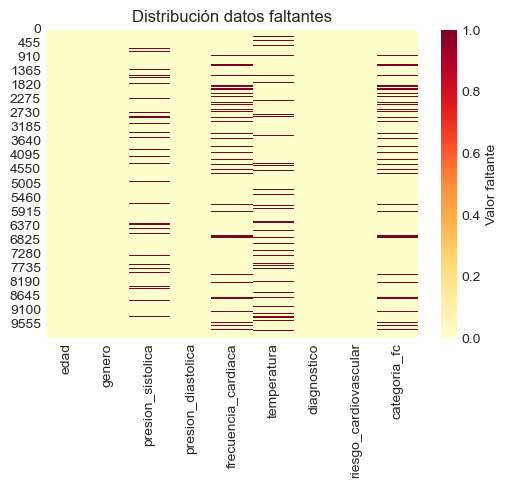


=== Valores faltantes después de la limpieza: ===
edad                        0
genero                      0
presion_sistolica           0
presion_diastolica          0
frecuencia_cardiaca         0
temperatura                 0
diagnostico                 0
riesgo_cardiovascular       0
categoria_fc             1034
dtype: int64


In [2]:
# 1. Limpieza de datos: Manejo de valores faltantes
print("\n\n=== 1. Limpieza de datos ===")
print("\nValores faltantes antes de la limpieza:")
print(pacientes_df.isnull().sum())

# Crear visualización de matriz de correlación con datos faltantes
plt.figure(figsize=(6, 4))
sns.heatmap(pacientes_df.isnull(), cmap='YlOrRd', cbar_kws={'label':'Valor faltante'}) 
#se le da 3 parametros a sns.heatmap, el primero es el pacientes_de.isnull, 2 los colores y 3 las etiquetas¿?
plt.title('Distribución datos faltantes')
plt.show()

    
# Imputación de valores faltantes usando la mediana para mediciones numéricas
imputer = SimpleImputer(strategy= 'median') #sustituimos los valores nulos por la media

columnas_numericas = ['presion_sistolica', 'presion_diastolica', 'frecuencia_cardiaca' , 'temperatura']
#aplicamos la imputacion a las columnas numéricas, reemplazo de los valores faltantes
pacientes_df[columnas_numericas] = imputer.fit_transform(pacientes_df[columnas_numericas])



#imprimimos el resultado
print("\n=== Valores faltantes después de la limpieza: ===")

print(pacientes_df.isnull().sum())



#### Gráfico propuesto: Countplot para las categorías de frecuencia cardíaca (categoria_fc)


=== 2. Enriquecimiento de datos ===
       presion_sistolica  presion_diastolica
count       10000.000000        10000.000000
mean          120.301907           73.872354
std            22.424175           12.755227
min            80.000000           60.000000
25%           105.113099           61.361168
50%           119.860956           71.777373
75%           134.396654           82.479314
max           200.000000          126.307305

 Nueva característica de riesgo cardiovascular
riesgo_cardiovascular
False    6832
True     3168
Name: count, dtype: int64

 Nueva categoría "categoria_fc"
categoria_fc
Normal         8193
Bradicardia    1378
Taquicardia     429
Name: count, dtype: int64


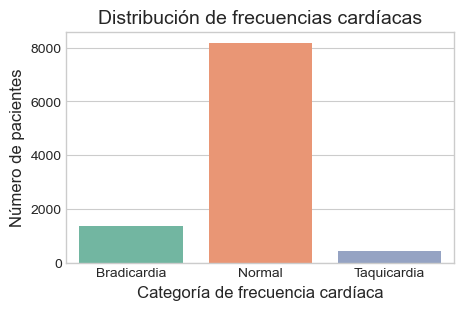

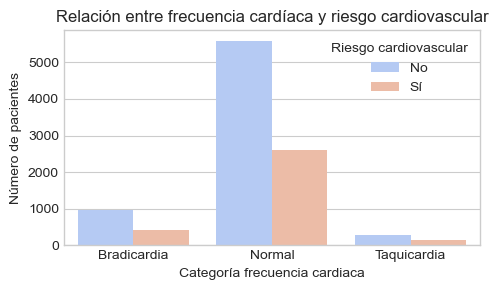

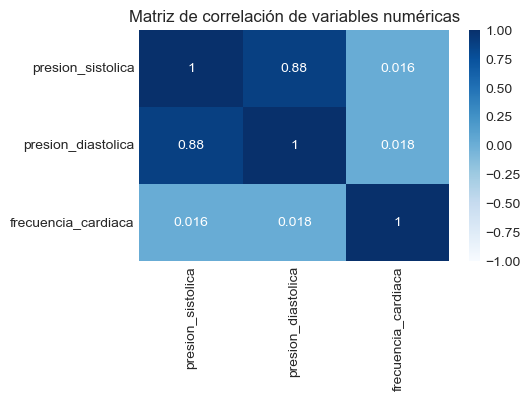

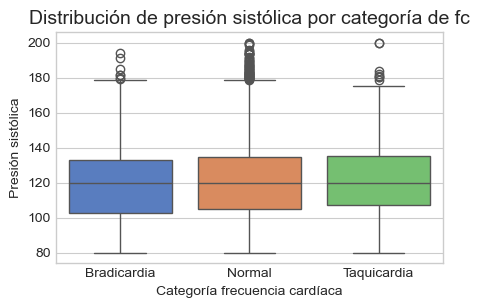

In [4]:
# 2. Enriquecimiento de datos: Crear nuevas características clínicamente relevantes
print("\n=== 2. Enriquecimiento de datos ===")

print(pacientes_df[['presion_sistolica', 'presion_diastolica']].describe())


# Calcular índice de riesgo cardiovascular basado en presión arterial
pacientes_df['riesgo_carsiovascular']= (  #creamos una nueva columna llamada riesgo_carsiovascular
    (pacientes_df['presion_sistolica'] >140) | \
    #la barra \se utiliza para saltar de linea y que no interrumpa la ejecucion
    (pacientes_df['presion_diastolica'] < 90)  #criterios de hipertension
)
# Crear categorías de frecuencia cardíaca según rangos clínicos

bins_fc =[0, 60, 100, float('inf')] #limites de la bicardia¿?
labels_fc = ['Bradicardia', 'Normal', 'Taquicardia']
pacientes_df['categoria_fc'] = pd.cut(pacientes_df['frecuencia_cardiaca'], 
                                     bins = bins_fc,
                                     labels = labels_fc)
#Mostrar la distribucion de riesgo cardiovascular
print ('\n Nueva característica de riesgo cardiovascular')
print (pacientes_df['riesgo_cardiovascular'].value_counts())

#Nueva categoria
print('\n Nueva categoría "categoria_fc"')
print(pacientes_df['categoria_fc'].value_counts())

####################### Distribución de Categorías de Frecuencia Cardíaca. ####################

# Configurar el tamaño de la figura
plt.figure(figsize=(5, 3))

# Crear el countplot, graficco
sns.countplot(data = pacientes_df, x = 'categoria_fc', hue = 'categoria_fc', palette ='Set2')


# Personalizar el gráfico
plt.title('Distribución de frecuencias cardíacas', fontsize = 14)
plt.xlabel('Categoría de frecuencia cardíaca', fontsize =12)
plt.ylabel('Número de pacientes' , fontsize =12)
#plt.legend(labels_fc)


              
# Mostrar el gráfico


########################### Riesgo Cardiovascular ####################
plt.figure(figsize=(5, 3))


#Creamos el gráfico de barras para mostrar la relación entre frecuencia cardíaca y riesgo cardiovascular
sns.countplot(data = pacientes_df, x= 'categoria_fc', hue = 'riesgo_cardiovascular', palette ='coolwarm')



# Agregar la leyenda fuera del gráfico
# plt.legend(title='Riesgo Cardiovascular', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Relación entre frecuencia cardíaca y riesgo cardiovascular')
plt.xlabel('Categoría frecuencia cardiaca')
plt.ylabel('Número de pacientes')
plt.legend(title = 'Riesgo cardiovascular', labels = ['No', 'Sí'])
# Ajustar para evitar solapamientos
plt.tight_layout()

plt.show()

#######################  Heatmap correlación entre vaiables. ###############
# Seleccionar columnas numéricas
numeric_cols =[ 'presion_sistolica', 'presion_diastolica', 'frecuencia_cardiaca']
matriz = pacientes_df[numeric_cols].corr()

# Crear el heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(matriz, annot = True, cmap = 'Blues', vmin = -1, vmax = 1)
plt.title('Matriz de correlación de variables numéricas')
plt.show()

####################### Boxplot para presión arterial por categoría de frecuencia cardíaca ###################

plt.figure(figsize=(5, 3))
sns.boxplot(data = pacientes_df, x ='categoria_fc',  y = 'presion_sistolica', hue = 'categoria_fc', palette = 'muted' , legend = False)
#Personalizamos gráfico
plt.title('Distribución de presión sistólica por categoría de fc', fontsize = 14)
plt.xlabel('Categoría frecuencia cardíaca', fontsize = 10)
plt.ylabel('Presión sistólica', fontsize = 10)

plt.show()


In [5]:
# 3. Preprocesamiento de datos
print("\n=== 3. Preprocesamiento ===")

# Crear las categorías de edad antes de la normalización
bins_edad = [0,25,45,65,float('inf')]
labels_edad  = ['joven', 'Adulto','Maduro', 'Mayor']
pacientes_df['grupo_edad'] = pd.cut(pacientes_df['edad'],
                                    bins = bins_edad,
                                    labels = labels_edad)

                        

# Estandarización de variables numéricas para análisis estadístico
scaler = StandardScaler()
variables_numericas = [
    'edad',
    'presion_sistolica',
    'presion_diastolica',
    'frecuencia_cardiaca',
    'temperatura'
]

pacientes_df[variables_numericas] =scaler.fit_transform(pacientes_df[variables_numericas])# el fit_transfom calcula las variables estadisticas
pacientes_scaled = pacientes_df.copy() #hacemos una copia del df, para usar el df original mas adelante


# Normalización usando Min-Max Scaler para variables que deben estar entre 0 y 1

normalizer = MinMaxScaler() #normalizer es lo que normaliza entre 0 y 1
pacientes_scaled[variables_numericas] = normalizer.fit_transform(pacientes_df[variables_numericas])


# Codificación de variables categóricas para análisis numérico
#conbierte las variables de texto en número:
le = LabelEncoder()
pacientes_df['genero_codificado'] = le.fit_transform(pacientes_df['genero'])
pacientes_df['diagnostico_codificado'] =le.fit_transform(pacientes_df['diagnostico'])

print("\nEstadísticas descriptivas después del preprocesamiento:")
print(pacientes_df.describe())




=== 3. Preprocesamiento ===

Estadísticas descriptivas después del preprocesamiento:
               edad  presion_sistolica  presion_diastolica  \
count  1.000000e+04       1.000000e+04        1.000000e+04   
mean  -1.509903e-16      -2.444267e-16        9.897860e-16   
std    1.000050e+00       1.000050e+00        1.000050e+00   
min   -3.819300e+00      -1.797342e+00       -1.087636e+00   
25%   -6.959762e-01      -6.773746e-01       -9.809164e-01   
50%   -3.143924e-02      -1.966504e-02       -1.642532e-01   
75%    6.995514e-01       6.285829e-01        6.748128e-01   
max    3.889329e+00       3.554293e+00        4.111065e+00   

       frecuencia_cardiaca   temperatura  genero_codificado  \
count         1.000000e+04  1.000000e+04       10000.000000   
mean          3.865352e-16  3.021938e-15           0.467600   
std           1.000050e+00  1.000050e+00           0.498974   
min          -2.514264e+00 -3.543110e+00           0.000000   
25%          -6.229226e-01 -6.167373e-01

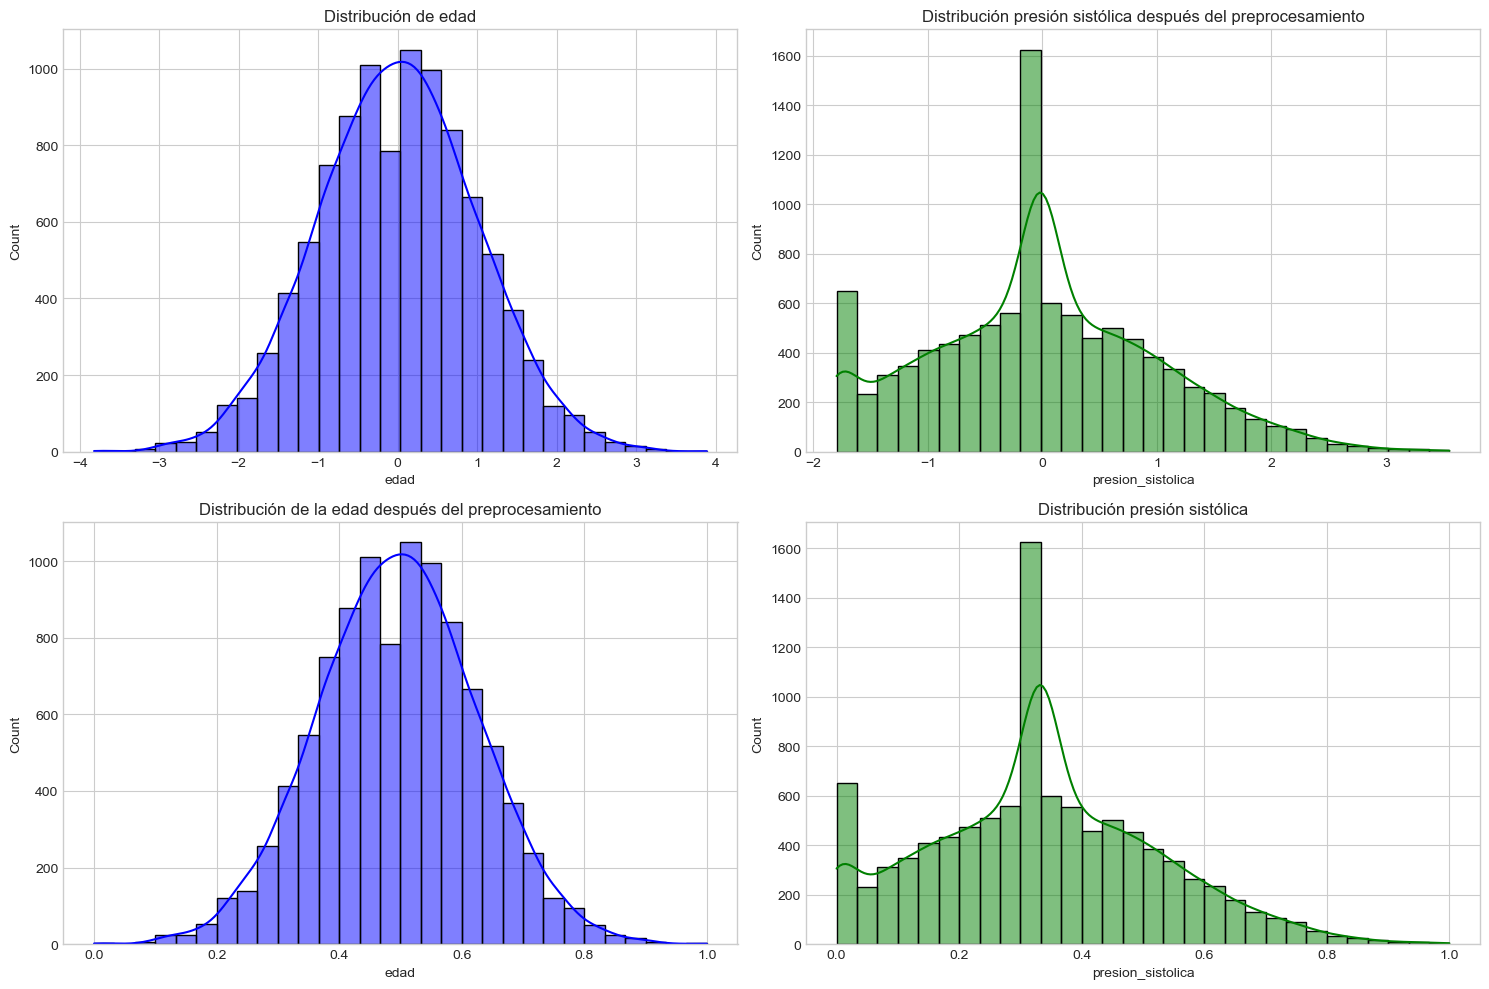

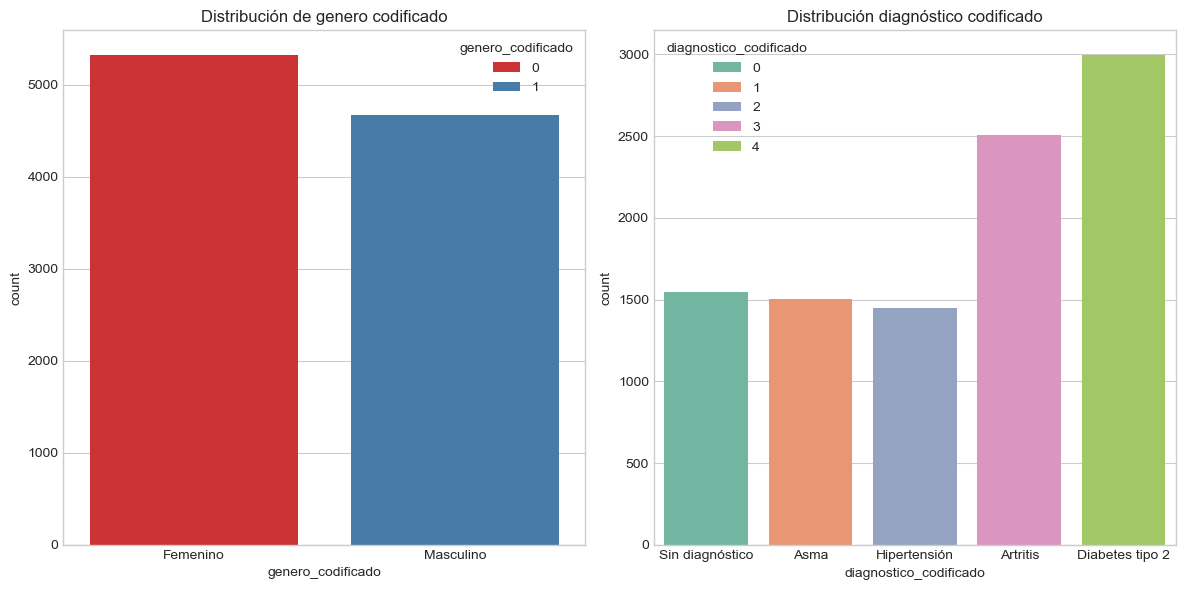

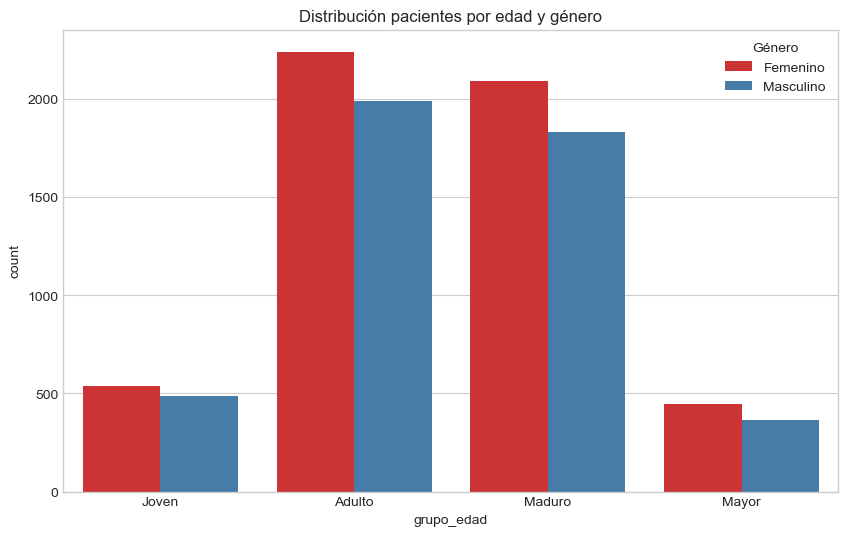

In [9]:
# Configurar tamaño de las gráficas
plt.figure(figsize=(15, 10))

# 1. Distribución de variables numéricas antes y después del preprocesamiento
# Antes del preprocesamiento
plt.subplot(2,2,1)
sns.histplot(pacientes_df['edad'], kde = True, color = 'blue', bins = 30) #bins = columnas
plt.title('Distribución de edad') 

plt.subplot(2, 2, 2)
sns.histplot(pacientes_df['presion_sistolica'], kde= True, color= 'green', bins = 30)
plt.title('Distribución presión sistólica después del preprocesamiento')


# 2. Distribución de las variables numéricas después del preprocesamiento (usando MinMaxScaler)
plt.subplot(2, 2, 3)
sns.histplot(pacientes_scaled['edad'], kde= True, color= 'blue', bins = 30)
plt.title('Distribución de la edad después del preprocesamiento')

plt.subplot(2,2,4)
sns.histplot(pacientes_scaled['presion_sistolica'], kde= True, color= 'green', bins = 30)
plt.title('Distribución presión sistólica')




# Ajuste del diseño para las 4 gráficas
plt.tight_layout()

# 3. Distribución de las variables categóricas codificadas
# Visualizar la codificación de género y diagnóstico con hue para diferenciación por género
plt.figure(figsize =(12,6))

plt.subplot(1, 2, 1)
sns.countplot(x ='genero_codificado', data = pacientes_df, hue='genero_codificado', palette = 'Set1')
plt.title('Distribución de genero codificado')
plt.xticks([0, 1], ['Femenino', 'Masculino'])



# Visualizar la distribución del diagnóstico con hue para diferenciación por diagnóstico
#plt.figure(figsize =(12,6)) # si no ponermos tamaño se ajusta automáticamente.

plt.subplot(1, 2, 2)
sns.countplot(x ='diagnostico_codificado', data = pacientes_df, hue ='diagnostico_codificado', palette = 'Set2' )
plt.title('Distribución diagnóstico codificado')
plt.xticks([0,1,2,3,4], pacientes_df['diagnostico'].unique()) #le daremos un valor unico al df segun si es 1,2,3,4


# Ajuste del diseño para las gráficas categóricas
plt.tight_layout()



# Graficar la distribución de los pacientes por edad y género codificado
plt.figure(figsize =(10,6))
sns.countplot(x = 'grupo_edad', data = pacientes_df, hue = "genero_codificado", palette ='Set1')
plt.title('Distribución pacientes por edad y género')
plt.xticks([0, 1 , 2, 3], ['Joven', 'Adulto', 'Maduro', 'Mayor'])
plt.legend(title = 'Género', labels = ['Femenino', 'Masculino'])


plt.show()
